In [4]:
# draw network based on population data
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm

In [13]:
pop = pd.read_excel('24년2월경남인구.xlsx')
pop = pop.sort_values(by='인구수')

In [15]:
pop

,이름,인구수
8,의령군,26239
14,산청군,34559
15,함양군,37233
12,남해군,41562
17,합천군,41873
13,하동군,42096
11,고성군,50988
10,창녕군,60040
16,거창군,60717
9,함안군,64138


In [11]:
len(pop['인구수'].values)

18

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)


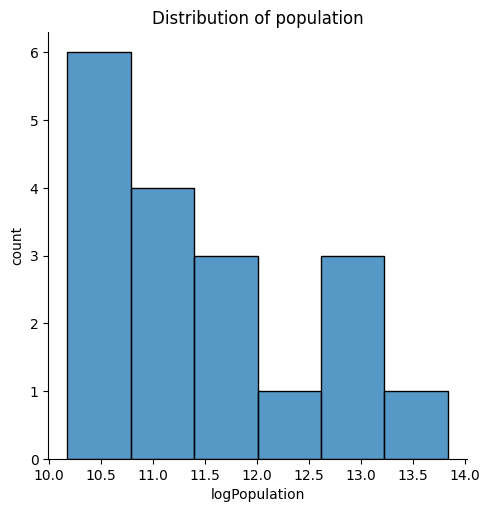

In [18]:
import seaborn as sns
sns.displot(np.log(pop['인구수'])) 
# sns.displot(pop['인구수'])
plt.xlabel('logPopulation')
plt.ylabel('count')
plt.title('Distribution of population')
plt.show() # ~ normalized

In [6]:
# add the font
fm.fontManager.addfont('BinggraeII.ttf')

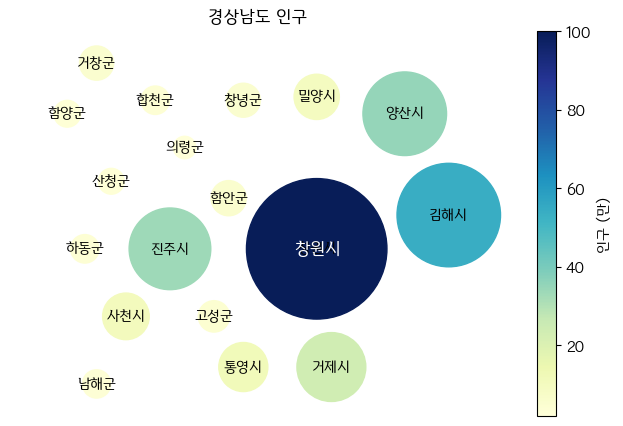

In [63]:
cmap = plt.cm.YlGnBu
fig, ax = plt.subplots(1,1,figsize=(8,5))
mpl.rcParams["font.family"] = 'Binggrae?'
G = nx.Graph()
G.add_nodes_from(pop['이름'])
pos = {'합천군':(300,520),'함양군':(150,500),'산청군':(225,400),'거창군':(200,575),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(400,200),'통영시':(450,125),'사천시':(250,200),'진주시':(325,300),'밀양시':(575,525),'창원시':(575,300)
      ,'함안군':(425,375),'양산시':(725,500),'김해시':(800,350), '의령군':(350,450),'남해군':(200,100),'거제시':(600,125)}
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, font_size=10, node_size=pop['인구수']/100, 
                 node_color=pop['인구수'], cmap=cmap, font_family='Binggrae?')
# add color bar
norm = mpl.colors.Normalize(vmin=2, vmax=100)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical', label='인구 (만)')
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.62,
    0.42,
    "창원시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
plt.title('경상남도 인구')
plt.margins(0.15,0.1)

# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
plt.show()
fig.savefig('경상남도인구.png')

In [7]:
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
fm.fontManager.addfont('BinggraeII.ttf')
mpl.rcParams["font.family"] = 'Binggrae?'

In [43]:
import numpy as np
expList = []
for i in range(13):
    expList.append(0.3)
for j in range(5):
    expList.append(0.01)
expList   

[0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

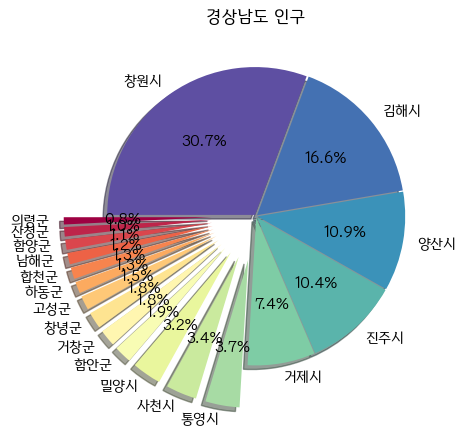

In [44]:
popPie = pd.Series(pop['인구수'].values, index=pop['이름'].values)
popPie.plot(kind='pie', title='경상남도 인구', autopct='%1.1f%%', colormap=plt.cm.Spectral,shadow=True,explode=expList, startangle=180)
plt.margins(0,0.2)
plt.show()